# Testing method of image preprocessing

In [5]:
# Import stuff
import numpy as np
import pandas as pd
import cv2
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt

from ocr.helpers import implt

In [6]:
def elastic_transform(image, alpha, sigma, alpha_affine, random_state=None):
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    shape_size = shape[:2]
    
    print("Shape", shape)
    print("Shape size", shape_size)
    
    
    blur_size = int(4*sigma) | 1
    dx = alpha * cv2.GaussianBlur((random_state.rand(*shape) * 2 - 1),
                                  ksize=(blur_size, blur_size),
                                  sigmaX=sigma)
    dy = alpha * cv2.GaussianBlur((random_state.rand(*shape) * 2 - 1),
                                  ksize=(blur_size, blur_size),
                                  sigmaX=sigma)
#     dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
#     dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha

    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1))

#     return cv2.remap(image, dx, dy, interpolation=cv2.INTER_LINEAR)
    image =  map_coordinates(image, indices, order=1, mode='constant').reshape(shape)
    
    implt(image, 'gray')
    
    # Random affine
    center_square = np.float32(shape_size) // 2
    print(center_square)
    square_size = min(shape_size) // 3
    print(square_size)
    pts1 = np.float32([center_square + square_size,
                       [center_square[0]+square_size, center_square[1]-square_size],
                       center_square - square_size])
    print("Alpha_affine", alpha_affine)
    print(pts1)
    pts2 = pts1 + random_state.uniform(-alpha_affine, alpha_affine, size=pts1.shape).astype(np.float32)
    print(pts2)
    M = cv2.getAffineTransform(pts1, pts2)
    image = cv2.warpAffine(image, M, shape_size[::-1], borderMode=cv2.BORDER_CONSTANT)

    return image

In [7]:
# Load images
im = cv2.imread("data/words/V_1502630277.783673.jpg", -1)
im2 = cv2.imread("data/words/uznale_1502630263.0986328.jpg", -1)

im = im2

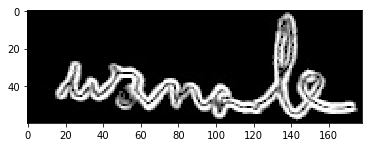

Shape (60, 178)
Shape size (60, 178)


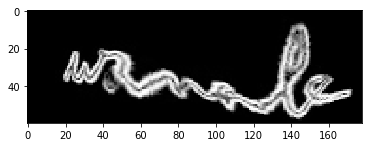

[ 30.  89.]
20
Alpha_affine 1.78
[[  50.  109.]
 [  50.   69.]
 [  10.   69.]]
[[  48.6170578   109.33018494]
 [  51.23277664   70.68430328]
 [  10.90877628   68.86372375]]


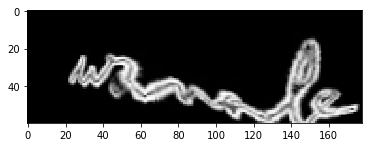

In [8]:
%matplotlib inline

implt(im, 'gray')
# Apply transformation on image
im_trans = elastic_transform(im, im.shape[1] * 2, im.shape[1] * 0.08, im.shape[1] * 0.01)

# Display result
implt(im_trans, 'gray')